# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Data Science/Helsinki_bike

%pip install seaborn
%pip install matplotlib

In [ ]:
import datetime
import calendar
import collections

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from networkx.algorithms import community
import community.community_louvain as community_louvain
from operator import itemgetter

import folium
from folium import plugins

dataframe = pd.read_csv("./helsinki_reduced.csv", low_memory=False)
dataframe.head()

departure               return  departure_id    departure_name  \
0  2020-03-23 06:09:44  2020-03-23 06:16:26            86          Kuusitie   
1  2020-03-23 06:11:58  2020-03-23 06:26:31            26        Kamppi (M)   
2  2020-03-23 06:16:29  2020-03-23 06:24:23           268  Porolahden koulu   
3  2020-03-23 06:33:53  2020-03-23 07:14:03           751        Vallipolku   
4  2020-03-23 06:36:09  2020-03-23 07:04:10            62  Länsisatamankatu   

   return_id       return_name  distance (m)  duration (sec.)  \
0      111.0     Esterinportti        1747.0            401.0   
1       10.0       Kasarmitori        1447.0            869.0   
2      254.0       Agnetankuja        1772.0            469.0   
3      106.0   Korppaanmäentie        7456.0           2406.0   
4      121.0  Vilhonvuorenkatu        7120.0           1679.0   

   avg_speed (km/h)  departure_latitude  departure_longitude  return_latitude  \
0          0.261397           60.195245            24.901900        60.197572   
1          0.099908           60.168610            24.930537        60.165017   
2          0.226695           60.195540            25.053581        60.187234   
3          0.185935           60.227827            24.819614        60.203474   
4          0.254437           60.158928            24.909692        60.186463   

   return_longitude  Air temperature (degC)  
0         24.926781                     0.9  
1         24.949473                     0.9  
2         25.036412                     0.9  
3         24.898930                     0.9  
4         24.967872                     0.9

In [ ]:
#@title Filtering
"""
df = dataframe.copy()

df[['departure','return']] =  df[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df = df[df['departure'].dt.year == 2020]



df = df[(50 < df['distance (m)']) & (df['distance (m)'] < 30000)]
df = df[(180 < df['duration (sec.)']) & (df['duration (sec.)'] <  43200)]
df = df[(-20 < df['Air temperature (degC)']) & (df['Air temperature (degC)'] < 40)]

df.dropna()
df.to_csv('./helsinki_reduced_prova.csv', encoding='utf-8')
df.tail()
"""

In [ ]:
#draw function
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

# Undirected graph

In [ ]:
#G = nx.from_pandas_edgelist(dataframe, 'departure_name', 'return_name', edge_attr=['duration (sec.)','distance (m)'])
G = nx.from_pandas_edgelist(dataframe, 'departure_name', 'return_name',
                            edge_attr='distance (m)', create_using=nx.Graph())

print(G)

Graph with 347 nodes and 31693 edges


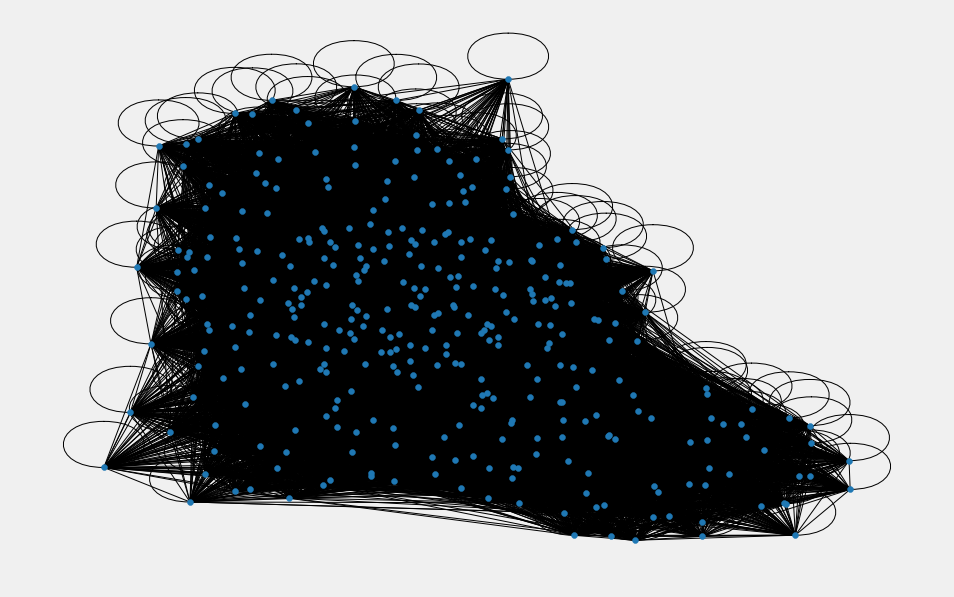

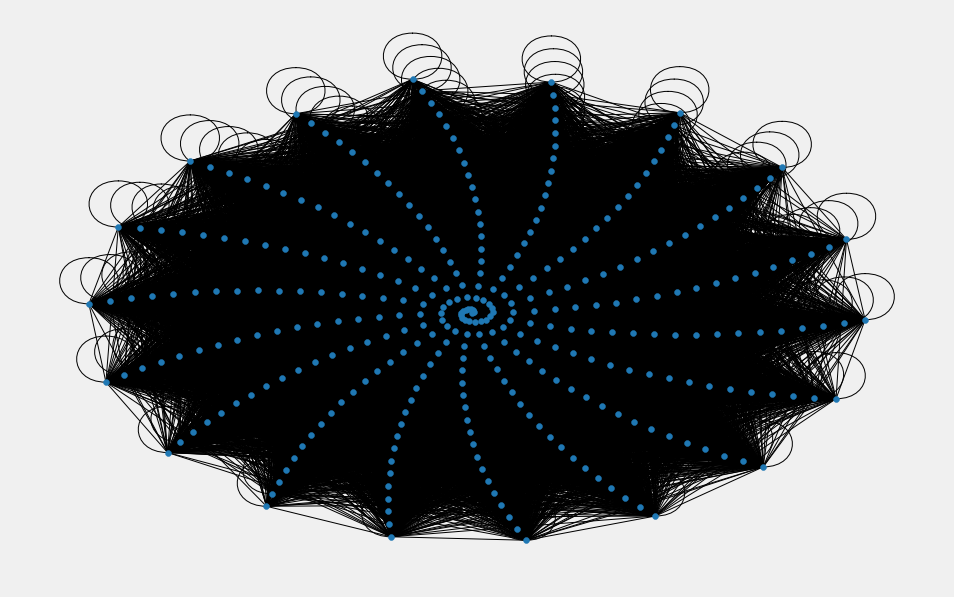

"\npos_frucht = nx.fruchterman_reingold_layout(G)\nplt.style.use('fivethirtyeight')\nplt.rcParams['figure.figsize'] = (15, 10)\nplt.axis('off')\nnx.draw_networkx(G, pos_frucht, with_labels = False, node_size = 35)\nplt.show()\n"

In [ ]:
#@title Layouts
import warnings
warnings.filterwarnings('ignore')

pos_spring = nx.spring_layout(G)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 10)
plt.axis('off')
nx.draw_networkx(G, pos_spring, with_labels = False, node_size = 35)
plt.show()

pos_spiral = nx.spiral_layout(G)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 10)
plt.axis('off')
nx.draw_networkx(G, pos_spiral, with_labels = False, node_size = 35)
plt.show()
'''
pos_frucht = nx.fruchterman_reingold_layout(G)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 10)
plt.axis('off')
nx.draw_networkx(G, pos_frucht, with_labels = False, node_size = 35)
plt.show()
'''

In [ ]:
print("Graph metrics\n")
density = nx.density(G)
print("Network density:", density)
'''
triadic_closure = nx.transitivity(G)  #it shows how the nodes tend to form triangles
print("Triadic closure:", triadic_closure)
'''
eccentricity = nx.eccentricity(G)
print("Eccentricity:", eccentricity)
diameter = nx.diameter(G)
print("Diameter:", diameter)
radius = nx.radius(G)
print("Radius:", radius)

periphery = list(nx.periphery(G))
print("Periphery:", periphery)
center = nx.center(G)
print("Center:", center)

cluster_coeff = nx.average_clustering(G)
print("Average cluster coefficient:", cluster_coeff)

Graph metrics

Network density: 0.5279438956539122
Eccentricity: {'Kuusitie': 2, 'Esterinportti': 2, 'Kamppi (M)': 2, 'Kasarmitori': 2, 'Porolahden koulu': 2, 'Agnetankuja': 2, 'Vallipolku': 2, 'Korppaanmäentie': 2, 'Länsisatamankatu': 2, 'Vilhonvuorenkatu': 2, 'Radiokatu': 2, 'Porthania': 2, 'Tyynenmerenkatu': 2, 'Hietalahdentori': 2, 'Itämerentori': 2, 'Meilahden sairaala': 2, 'Koskelantie': 2, 'Kalasatama (M)': 2, 'Rautatieläisenkatu': 2, 'A.I. Virtasen aukio': 2, 'Töölönkatu': 2, 'Rautatientori / itä': 2, 'Roihupelto': 2, 'Siilitie (M)': 2, 'Hakaniemi (M)': 2, 'Rajasaarentie': 2, 'Näkinsilta': 2, 'Senaatintori': 2, 'Rautatientori / länsi': 2, 'Olympiastadion': 2, 'Tilkanvierto': 2, 'Stenbäckinkatu': 2, 'Pohjankulma': 2, 'Kalevalantie': 2, 'Tulisuontie': 2, 'Herttoniemi (M)': 2, 'Päijänteentie': 2, 'Kauppakorkeakoulu': 2, 'Nordenskiöldinaukio': 2, 'Brahen puistikko': 2, 'Vanha Viertotie': 2, 'Elimäenkatu': 2, 'Kiasma': 2, 'Ympyrätalo': 2, 'Jätkäsaarenlaituri': 2, 'Kanavaranta': 2, '

In [ ]:
print(nx.clustering(G))

(24.68095966698721, 25.14660607599177, 60.13811829623438, 60.253471042871574)

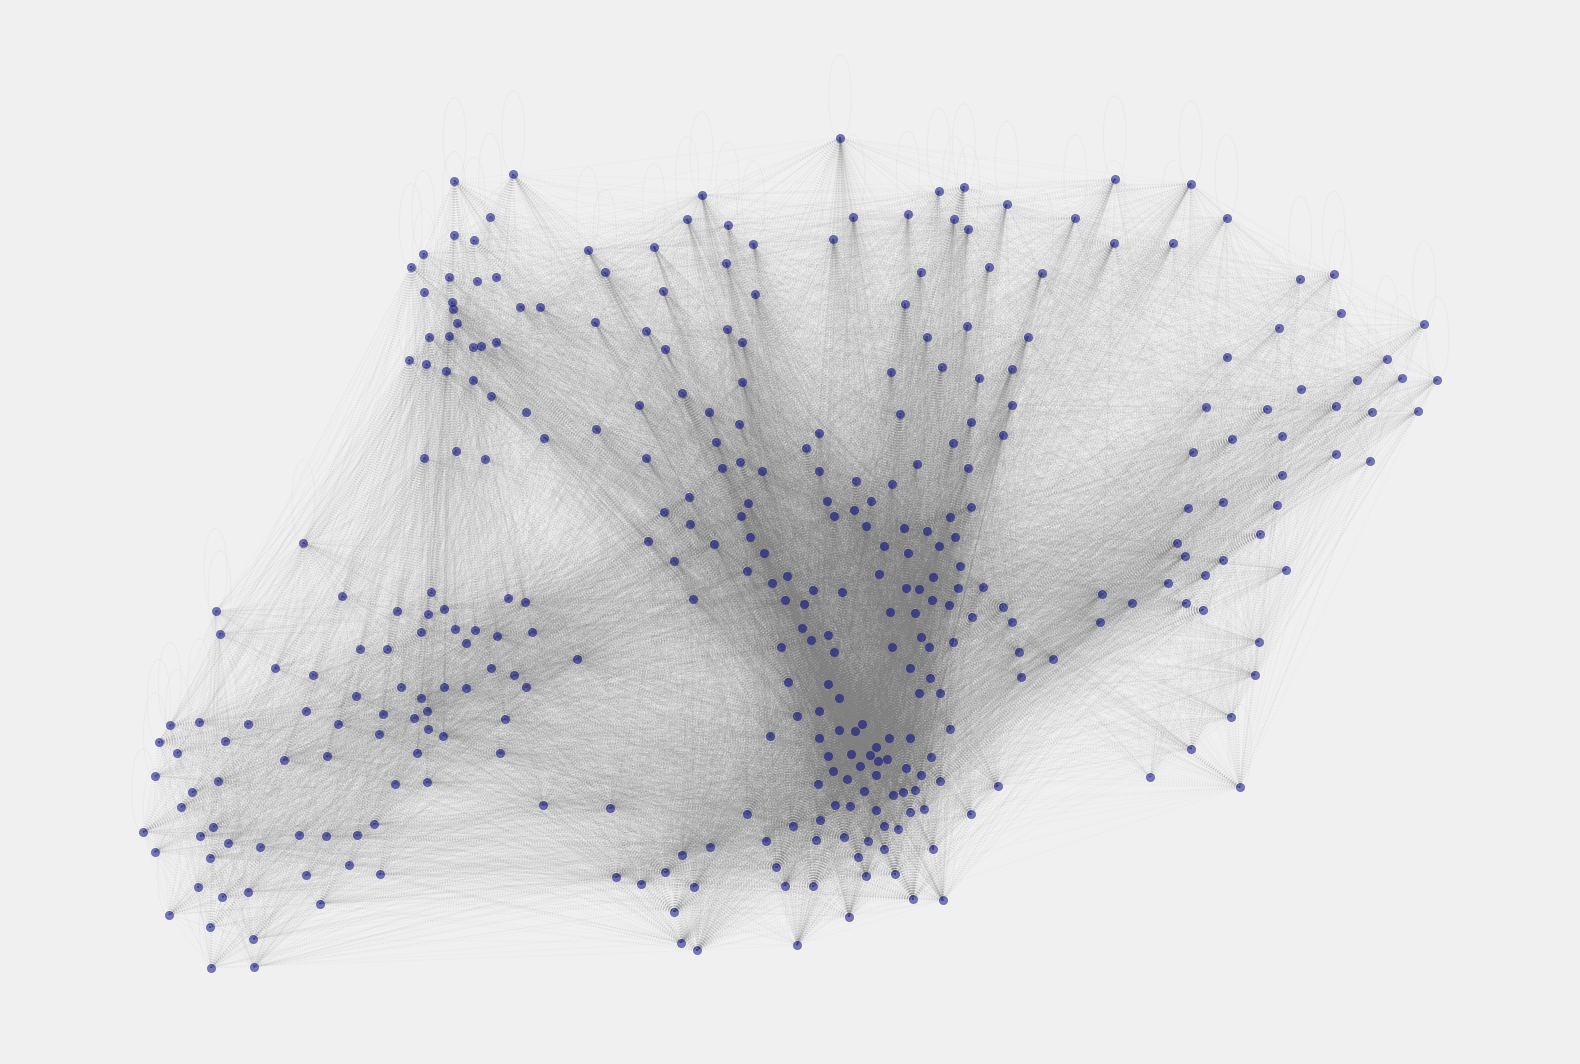

In [ ]:
# Figure
fig, ax = plt.subplots(figsize=(25,18))

# Positions
stations  = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
# setting names as indexes
stations.set_index('name',inplace=True)
# list of couples lat/long
stations["pos"] = list(zip(stations["longitude"].astype(float), stations["latitude"].astype(float)))
# setting a dictionary of positions (key: name, values: lat-long)
pos = stations.to_dict()['pos']

# Map "pos" attribute to nodes from pos dict
for node, position in pos.items():
    try:
        G.nodes[node]['pos'] = position
    except KeyError:
        pass

# Draw
nx.draw_networkx_nodes(G=G,pos=G.nodes.data('pos'), node_color='navy', alpha=0.5, node_size= 70)
nx.draw_networkx_edges(G=G,pos=G.nodes.data('pos'), edge_color='grey', style ="dotted", alpha=0.08, arrows=False)
ax.axis('off')

#print(G)

Text(0.5, 1.0, 'Closeness Centrality')

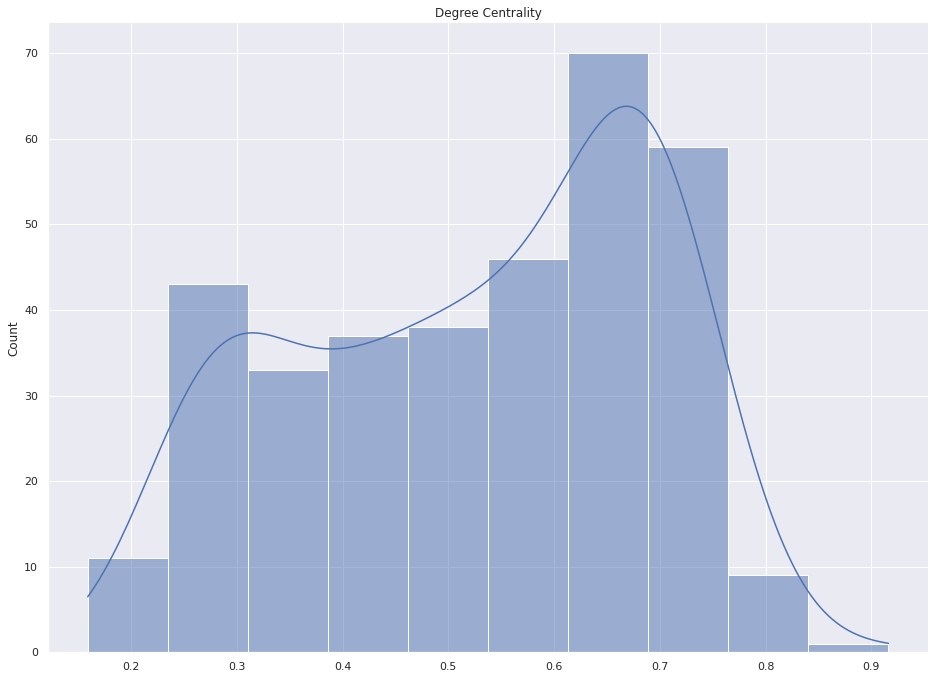

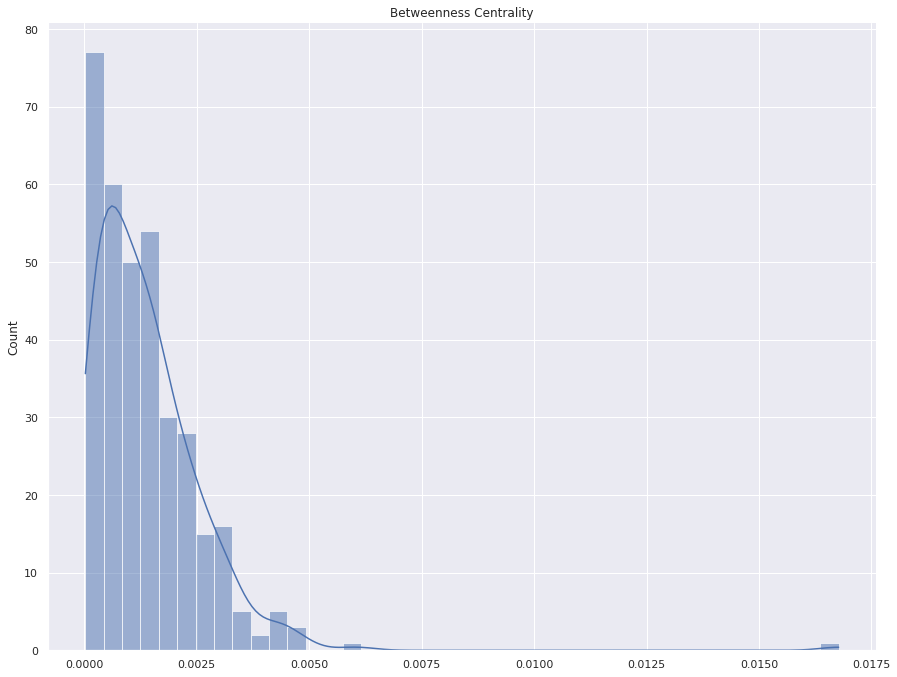

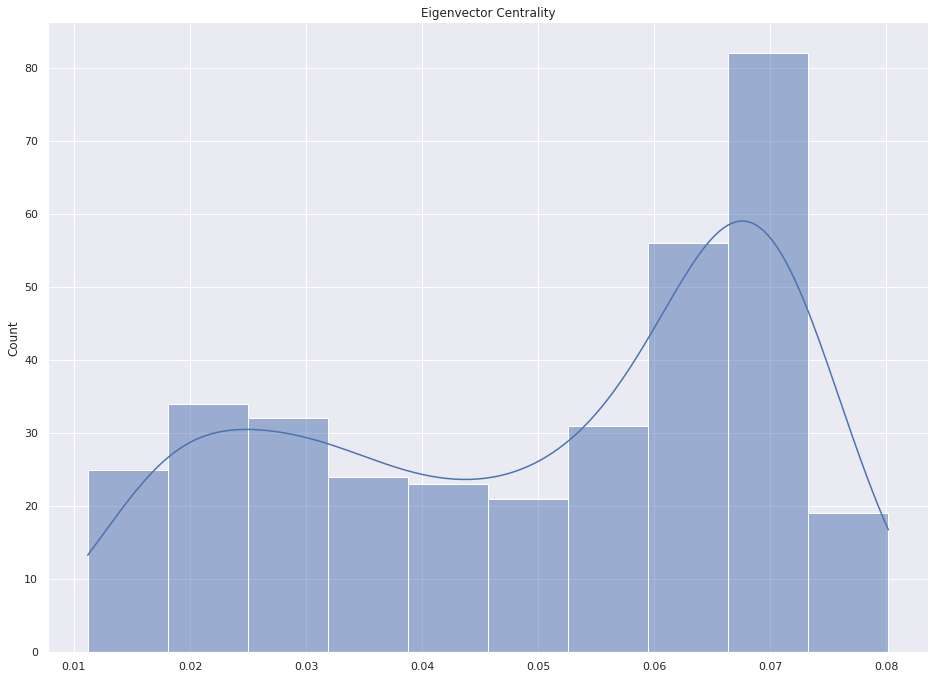

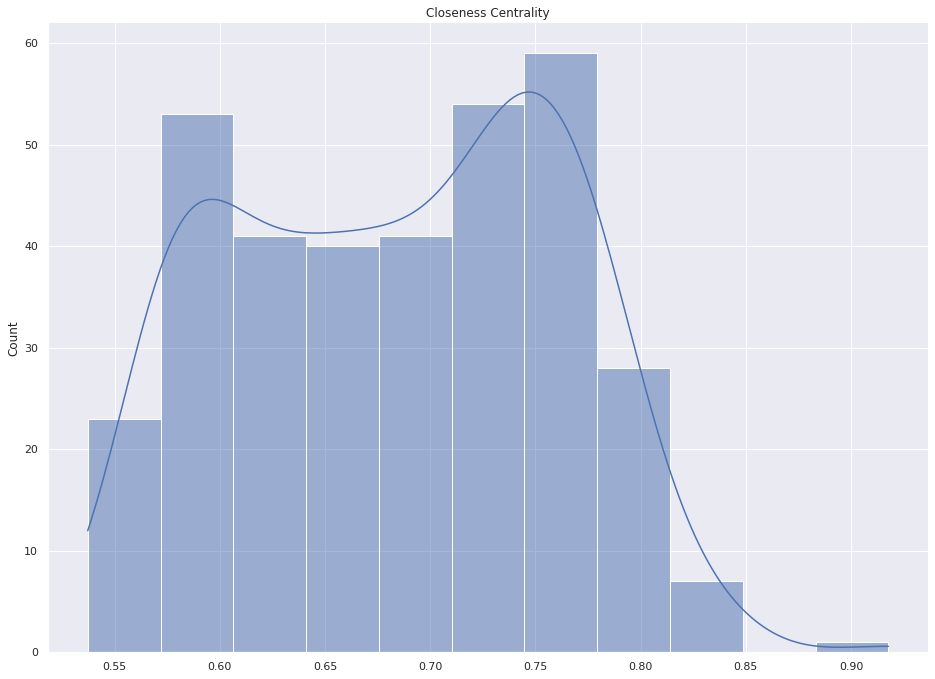

In [ ]:
#@title DISTRIBUTION OF CENTRALITY

dgr = nx.degree_centrality(G)
g=sns.displot(list(dgr.values()), kde=True)
g.fig.set_size_inches(15,10)
plt.title("Degree Centrality")

bet = nx.betweenness_centrality(G)
f=sns.displot(list(bet.values()), kde=True)
f.fig.set_size_inches(15,10)
plt.title("Betweenness Centrality")

eig = nx.eigenvector_centrality(G)
d=sns.displot(list(eig.values()), kde=True)
d.fig.set_size_inches(15,10)
plt.title("Eigenvector Centrality")

cls = nx.closeness_centrality(G)
e=sns.displot(list(cls.values()), kde=True)
e.fig.set_size_inches(15,10)
plt.title("Closeness Centrality")


In [ ]:
#@title NETWORK CENTRALITY MEASURES
print("Network Centrality Measures")

# degree centrality
degree_dict = nx.degree_centrality(G)

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("\nTop 10 nodes by degree centrality:\n")
for d in sorted_degree[:10]:
    print(d)

# betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("\nTop 10 nodes by betweenness centrality:\n")
for b in sorted_betweenness[:10]:
    print(b)

# eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("\nTop 10 nodes by eigenvector centrality:\n")
for c in sorted_eigen[:10]:
    print(c)

# closeness centrality
closeness_dict = nx.closeness_centrality(G)
sorted_eigen = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)
print("\nTop 10 nodes by closeness centrality:\n")
for a in sorted_eigen[:10]:
    print(a)


Network Centrality Measures

Top 10 nodes by degree centrality:

('Haukilahdenkatu', 0.9161849710982658)
('Paciuksenkaari', 0.815028901734104)
('Itämerentori', 0.8092485549132947)
('Laajalahden aukio', 0.8092485549132947)
('Huopalahdentie', 0.8092485549132947)
('Munkkiniemen aukio', 0.7890173410404624)
('Ympyrätalo', 0.7803468208092486)
('Töölöntulli', 0.7803468208092486)
('Tilkanvierto', 0.7745664739884393)
('Paciuksenkatu', 0.7687861271676301)

Top 10 nodes by betweenness centrality:

('Haukilahdenkatu', 0.016770176194176364)
('Itämerentori', 0.006045022098420727)
('Laajalahden aukio', 0.00492209853619512)
('Huopalahdentie', 0.004613727952284093)
('Lauttasaaren ostoskeskus', 0.004588142564995728)
('Paciuksenkaari', 0.004483805476075254)
('Lehtisaarentie', 0.004338788733709636)
('Jämeräntaival', 0.004315757146479604)
('Munkkiniemen aukio', 0.004248570121935488)
('Aalto-yliopisto (M), Korkeakouluaukio', 0.004127928138753119)

Top 10 nodes by eigenvector centrality:

('Haukilahdenkatu',

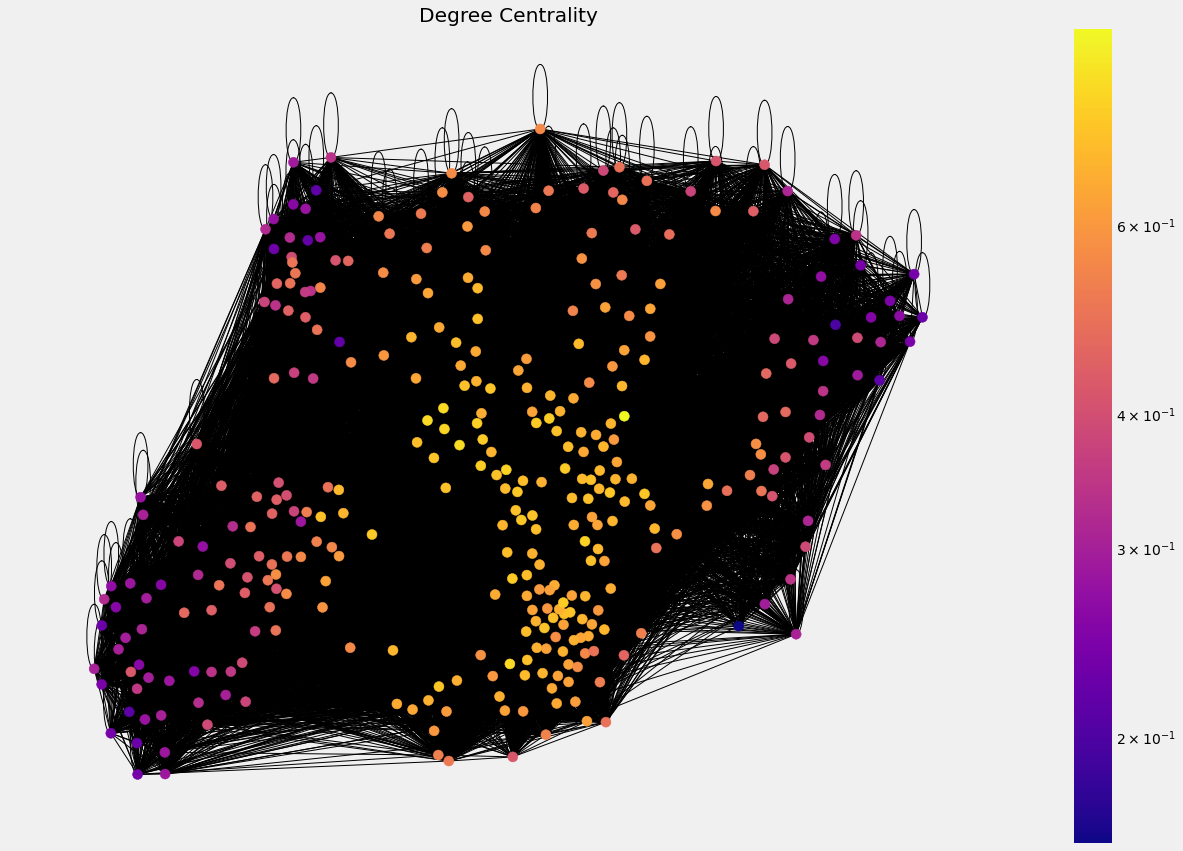

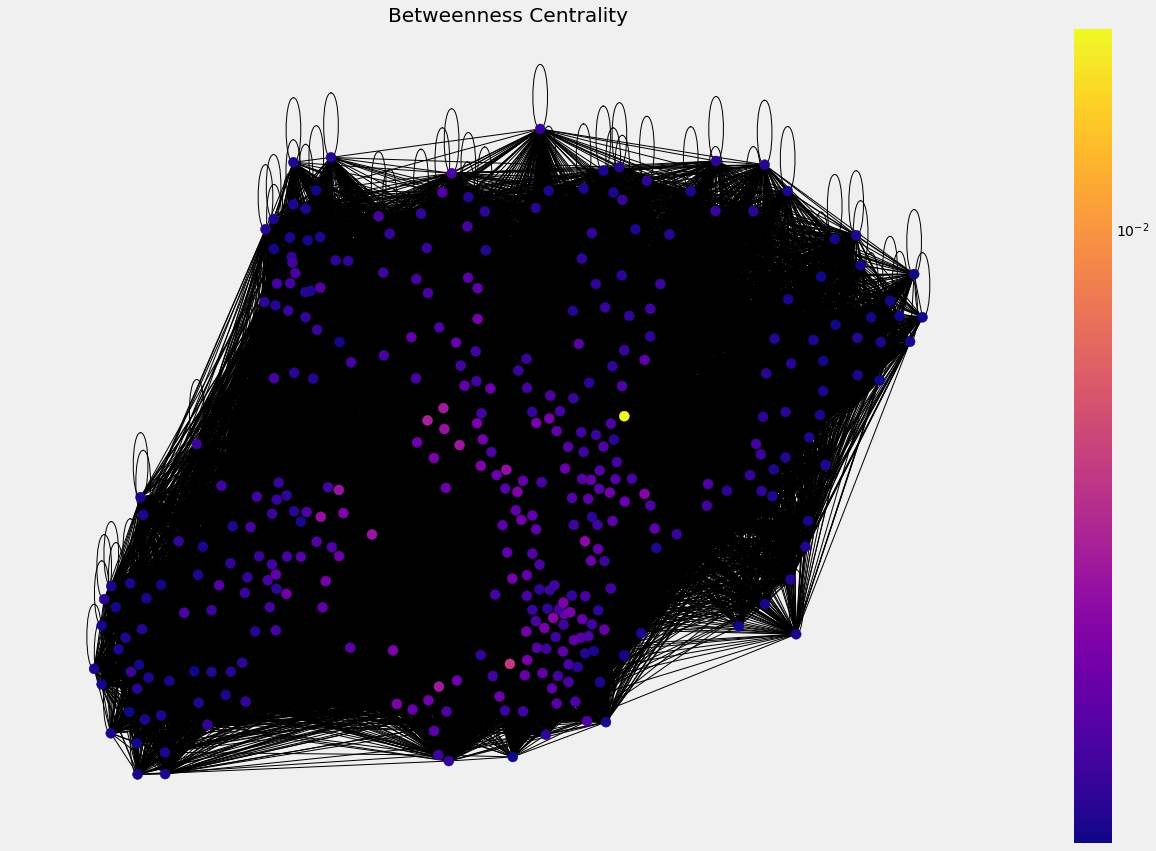

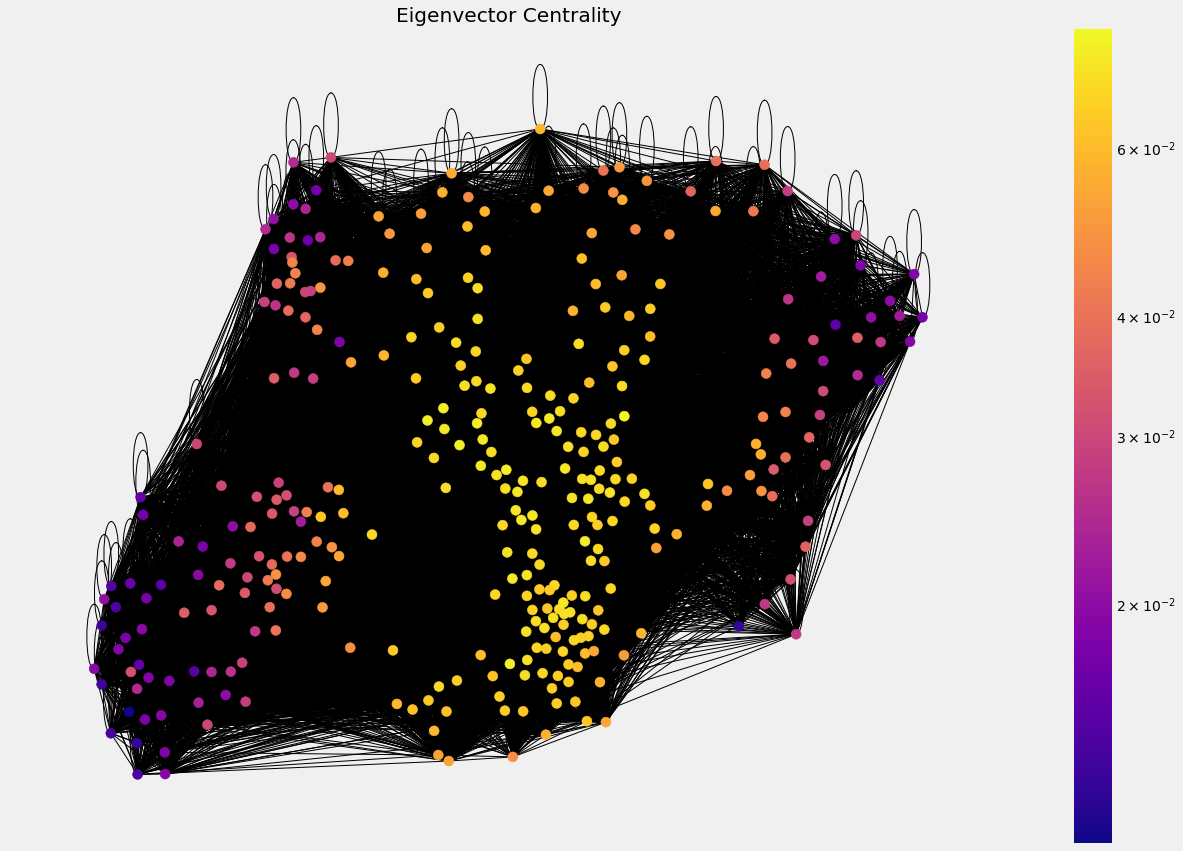

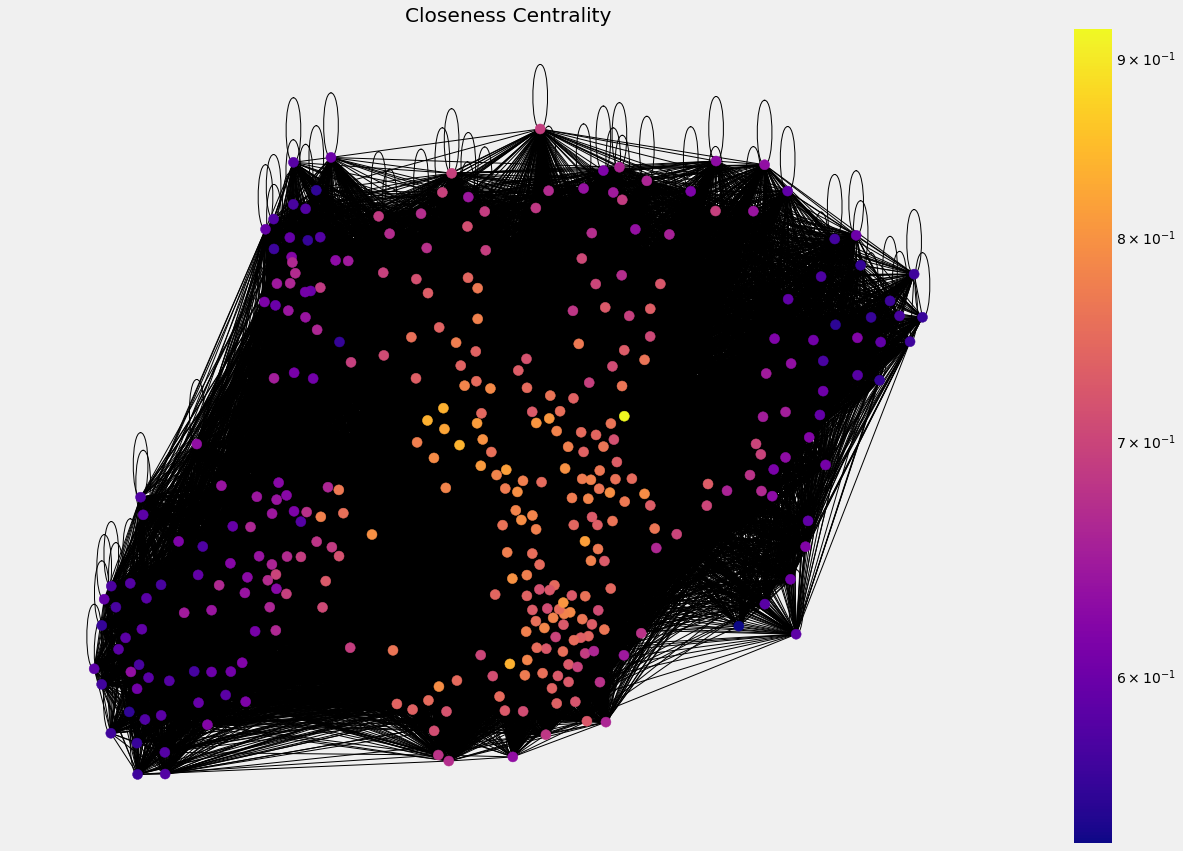

In [ ]:
#@title CENTRALITY GRAPHS
"""
#spring layout
plt.figure(figsize=(15,15))
pos_1 = nx.spring_layout(G)
draw(G, pos_1, degree_dict, 'Degree Centrality')

plt.figure(figsize=(15,15))
pos_2 = nx.spring_layout(G)
draw(G, pos_2, betweenness_dict, 'Betweenness Centrality')

plt.figure(figsize=(15,15))
pos_3 = nx.spring_layout(G)
draw(G, pos_3, eigenvector_dict, 'Eigenvector Centrality')

plt.figure(figsize=(15,15))
pos_4 = nx.spring_layout(G)
draw(G, pos_4, closeness_dict, 'Closeness Centrality')
"""
# map
pos=G.nodes.data('pos')
plt.figure(figsize=(20,14))
draw(G, pos, degree_dict, 'Degree Centrality')

plt.figure(figsize=(20,14))
draw(G, pos, betweenness_dict, 'Betweenness Centrality')

plt.figure(figsize=(20,14))
draw(G, pos, eigenvector_dict, 'Eigenvector Centrality')

plt.figure(figsize=(20,14))
draw(G, pos, closeness_dict, 'Closeness Centrality')


In [ ]:
# Helsinki map
def mapPlot(dataframe):
    df = dataframe.copy()
    df.dropna(inplace=True)
    df['freq'] = df.groupby('departure_name')['departure_name'].transform('count')
    #print(df.isna().sum())
    df["name"] = df["departure_name"]
    df = df[["name", "freq"]]
    df = df.drop_duplicates(subset=['name'])
    freq_dict = dict(zip(df.name, df.freq))

    df_stations = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv", index_col=False)
    df_stations = df_stations[df_stations["latitude"]<=60.254011]
    #print(df_stations.head())
    df_stations['freq']= df_stations['name'].map(freq_dict)
    #print(df_stations.head(), df_stations.isna().sum(), len(df_stations))
    df_stations["freq_adj"] = df_stations['freq']/(df_stations['freq'].median())
    df_stations.fillna(1, inplace=True)
    df_stations.dropna(inplace=True)

    # Map
    hel_map = folium.Map([60.1975594, 24.9320720], zoom_start=12)
    folium.TileLayer('CartoDB positron').add_to(hel_map)

    for index, row in df_stations.iterrows():
        folium.CircleMarker([row['latitude'],row['longitude']],
                        radius=row["freq_adj"],
                        popup=row['name'],
                        color="red",
                        fill_color="red"
                    ).add_to(hel_map)

    display(hel_map)

mapPlot(dataframe)

## Community detection

In [ ]:
#@title Cliques

# total number of cliques on network
print("Number of cliques in the graph:")
print(nx.graph_number_of_cliques(G))

# size of the largest clique in the graph
print("Size of the largest clique in the graph:")
print(nx.graph_clique_number(G))

Number of cliques in the graph:
3726758
Size of the largest clique in the graph:
124


In [ ]:
#@title Greedy modularity maximization

#C = community.greedy_modularity_communities(G, weight='distance (m)', resolution=1, best_n=None)
C = community.greedy_modularity_communities(G, weight='distance (m)', resolution=1.5, best_n=None)

sorted(C)

[frozenset({'Aalto-yliopisto (M), Tietotie',
            'Ahertajantie',
            'Auringonkatu',
            'Avaruuskatu',
            'Derby Business Park',
            'Elfvik',
            'Eteläinen Hesperiankatu',
            'Etuniementie',
            'Friisilänaukio',
            'Golfpolku',
            'Gransinmäki',
            'Gyldenintie',
            'Hagalundinpuisto',
            'Hakalehto',
            'Hanasaari',
            'Hauenkallio',
            'Hauenkalliontie',
            'Haukilahdenaukio',
            'Haukilahdenranta',
            'Innopoli',
            'Itämerentori',
            'Itäportti',
            'Kalevalantie',
            'Kansallismuseo',
            'Keilaniemi (M)',
            'Kirjurinkuja',
            'Koivu-Mankkaa',
            'Komeetankatu',
            'Kulttuuriaukio',
            'Kuunkatu',
            'Laajalahden keskus',
            'Lauttasaaren ostoskeskus',
            'Leppävaaran uimahalli',
            'Leppäva

In [ ]:
len(C[0])

88

In [ ]:
#@title Map of a single community

df = dataframe.copy()
df['freq'] = df.groupby('departure_name')['departure_name'].transform('count')
#print(df.isna().sum())
df["name"] = df["departure_name"]
df = df[["name", "freq"]]
df = df.drop_duplicates(subset=['name'])
freq_dict = dict(zip(df.name, df.freq))

df_stations = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv", index_col=False)
df_stations = df_stations[df_stations["latitude"]<=60.254011]
#print(df_stations.head())
#a single community is selected from C
df_stations = df_stations[df_stations['name'].isin(C[0])]
df_stations['freq']= df_stations['name'].map(freq_dict)
#print(df_stations.head(), df_stations.isna().sum(), len(df_stations))
df_stations["freq_adj"] = df_stations['freq']/(df_stations['freq'].median())
df_stations.fillna(1, inplace=True)
df_stations.dropna(inplace=True)

# Map
hel_map = folium.Map([60.1975594, 24.9320720], zoom_start=12)
folium.TileLayer('CartoDB positron').add_to(hel_map)

for index, row in df_stations.iterrows():
    folium.CircleMarker([row['latitude'],row['longitude']],
                    radius=row["freq_adj"],
                    popup=row['name'],
                    color="red",
                    fill_color="red",
                ).add_to(hel_map)

display(hel_map)

In [ ]:
#@title Louvain method

def communityLouvain(G):

    # Figure
    fig, ax = plt.subplots(figsize=(20,15))

    # Compute Louvain method
    # resolution: 1, 0.9, 0.8
    partition = community_louvain.best_partition(G, resolution=1.1, random_state=1)

    # Partition colormap
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)

    # Draw Nodes & Edges
    nx.draw_networkx_nodes(G, G.nodes.data('pos'), partition.keys(), node_size=70, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, G.nodes.data('pos'), alpha=0.015)

    # Labeling Axes
    ax.set_title('Helsinki City Bike Network Communities (Louvain method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')

communityLouvain(G)

In [ ]:
#@title Mappa delle communities
def communityLouvain_map(G):

    # Compute Louvain method
    # resolution: 1, 0.9, 0.8
    partition = community_louvain.best_partition(G, resolution=1.1, random_state=1)

    partition_0 = [k for k,v in partition.items() if int(v) == 0]
    partition_1 = [k for k,v in partition.items() if int(v) == 1]
    partition_2 = [k for k,v in partition.items() if int(v) == 2]
    partition_3 = [k for k,v in partition.items() if int(v) == 3]

    df = dataframe.copy()
    df['freq'] = df.groupby('departure_name')['departure_name'].transform('count')
    #print(df.isna().sum())
    df["name"] = df["departure_name"]
    df = df[["name", "freq"]]
    df = df.drop_duplicates(subset=['name'])
    freq_dict = dict(zip(df.name, df.freq))

    df_stations = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv", index_col=False)
    df_stations = df_stations[df_stations["latitude"]<=60.254011]
    #print(df_stations.head())

    # Map
    hel_map = folium.Map([60.1975594, 24.9320720], zoom_start=12)
    folium.TileLayer('CartoDB positron').add_to(hel_map)

    df_stations_0 = df_stations.copy()
    df_stations_1 = df_stations.copy()
    df_stations_2 = df_stations.copy()
    df_stations_3 = df_stations.copy()

    #selecting first community
    df_stations_0 = df_stations_0[df_stations_0['name'].isin(partition_0)]
    df_stations_0['freq']= df_stations_0['name'].map(freq_dict)
    df_stations_0["freq_adj"] = df_stations_0['freq']/(df_stations_0['freq'].median())
    df_stations_0.fillna(1, inplace=True)
    df_stations_0.dropna(inplace=True)


    for index, row in df_stations_0.iterrows():
        folium.CircleMarker([row['latitude'],row['longitude']],
                        radius=row["freq_adj"],
                        popup=row['name'],
                        color='blue',
                    ).add_to(hel_map)
    
    #selecting second community
    df_stations_1 = df_stations_1[df_stations_1['name'].isin(partition_1)]
    df_stations_1['freq']= df_stations_1['name'].map(freq_dict)
    df_stations_1["freq_adj"] = df_stations_1['freq']/(df_stations_1['freq'].median())
    df_stations_1.fillna(1, inplace=True)
    df_stations_1.dropna(inplace=True)


    for index, row in df_stations_1.iterrows():
        folium.CircleMarker([row['latitude'],row['longitude']],
                        radius=row["freq_adj"],
                        popup=row['name'],
                        color='yellowgreen',
                    ).add_to(hel_map)

    #selecting third community
    df_stations_2 = df_stations_2[df_stations_2['name'].isin(partition_2)]
    df_stations_2['freq']= df_stations_2['name'].map(freq_dict)
    df_stations_2["freq_adj"] = df_stations_2['freq']/(df_stations_2['freq'].median())
    df_stations_2.fillna(1, inplace=True)
    df_stations_2.dropna(inplace=True)


    for index, row in df_stations_2.iterrows():
        folium.CircleMarker([row['latitude'],row['longitude']],
                        radius=row["freq_adj"],
                        popup=row['name'],
                        color='gold',
                    ).add_to(hel_map)

    #selecting fourth community
    df_stations_3 = df_stations_3[df_stations_3['name'].isin(partition_3)]
    df_stations_3['freq']= df_stations_3['name'].map(freq_dict)
    df_stations_3["freq_adj"] = df_stations_3['freq']/(df_stations_3['freq'].median())
    df_stations_3.fillna(1, inplace=True)
    df_stations_3.dropna(inplace=True)


    for index, row in df_stations_3.iterrows():
        folium.CircleMarker([row['latitude'],row['longitude']],
                        radius=row["freq_adj"],
                        popup=row['name'],
                        color='hotpink',
                    ).add_to(hel_map)



    display(hel_map)

communityLouvain_map(G)

# Directed graph:

Helsinki network (directed graph):
DiGraph with 347 nodes and 56191 edges


(24.68095966698721, 25.14660607599177, 60.13802303636546, 60.255471500118965)

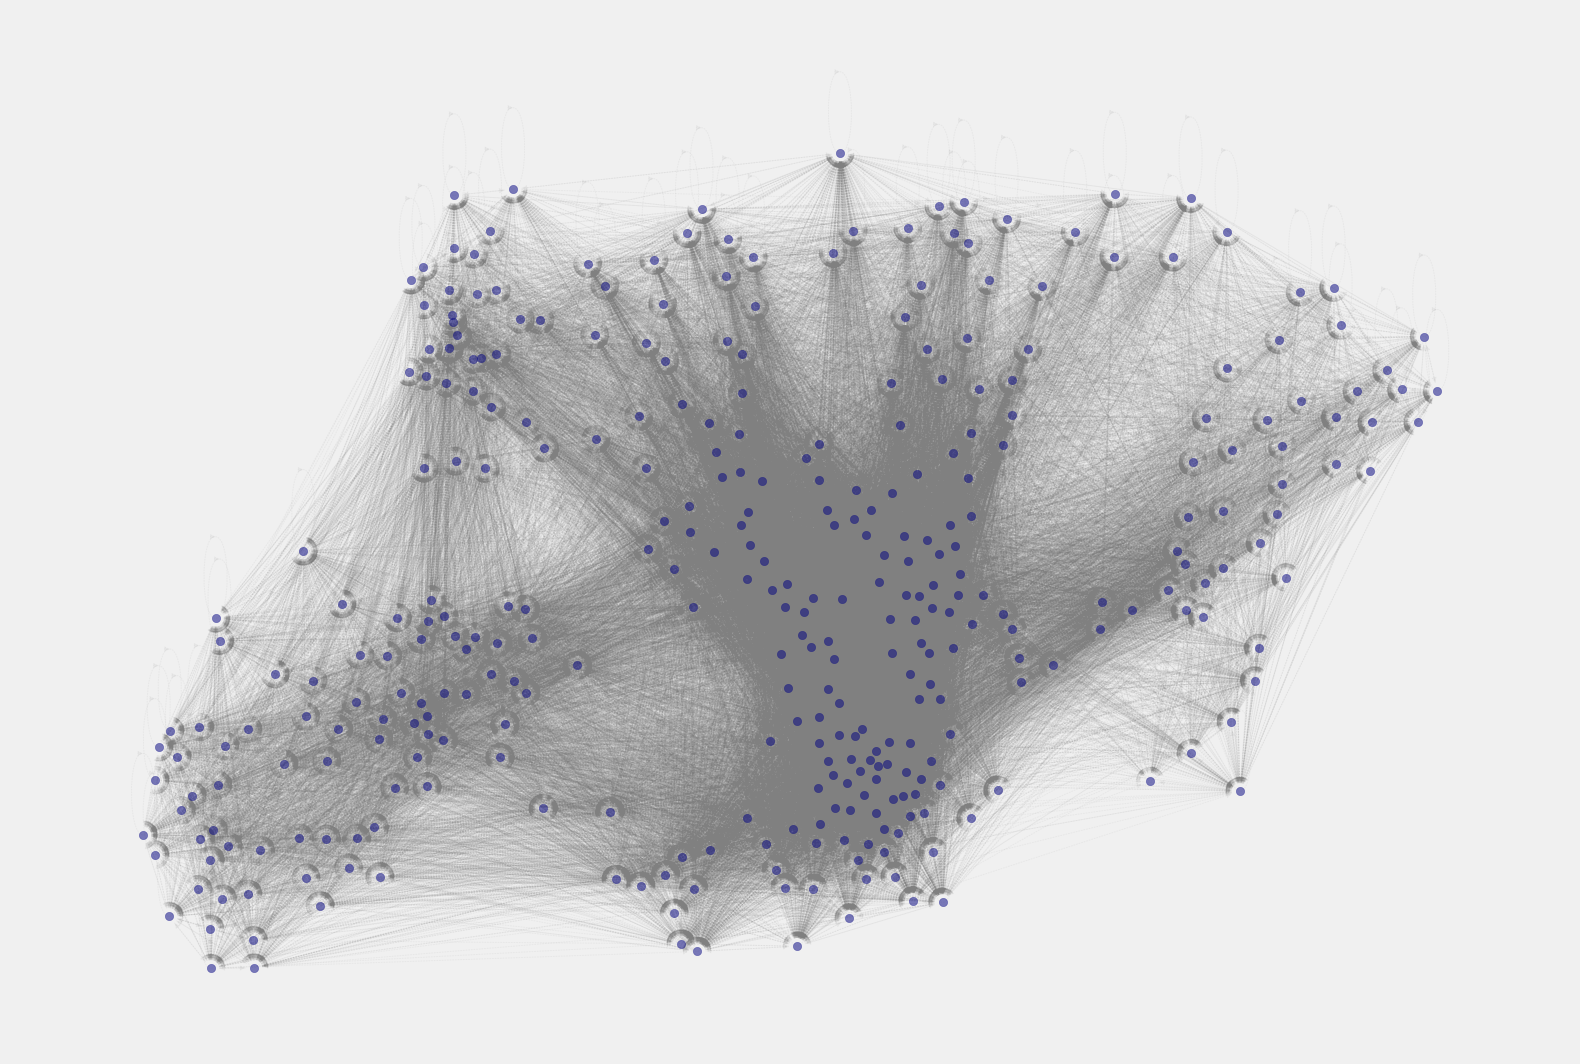

In [ ]:
DiG = nx.Graph()
DiG = nx.from_pandas_edgelist(dataframe, source='departure_name', target='return_name', edge_attr='distance (m)', create_using=nx.DiGraph())

print("Helsinki network (directed graph):")
print(DiG)

# Figure
fig, ax = plt.subplots(figsize=(25,18))

# Positions
stations  = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
#setting names as indexes
stations.set_index('name',inplace=True)
#list of couples lat/long
stations["pos"] = list(zip(stations["longitude"].astype(float), stations["latitude"].astype(float)))
#setting a dictionary of position (key: name, values: lat-long)
pos = stations.to_dict()['pos']

# Map "pos" attribute to nodes from pos dict
for node, position in pos.items():
    try:
        DiG.nodes[node]['pos'] = position
    except KeyError:
        pass

# Draw
#best colors: red, maroon, navy, green,  
nx.draw_networkx_nodes(G=DiG,pos=DiG.nodes.data('pos'), node_color='navy', alpha=0.5, node_size= 70)
nx.draw_networkx_edges(G=DiG,pos=DiG.nodes.data('pos'), edge_color='grey', style ="dotted", alpha=0.08, arrows=True)
ax.axis('off')


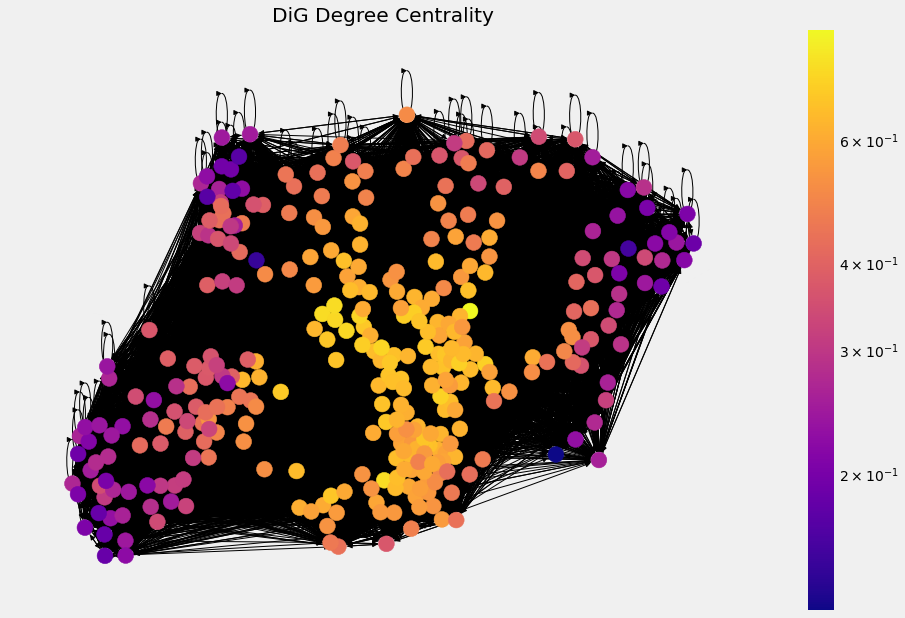

In [ ]:
plt.figure(figsize=(20,14))
draw(DiG, DiG.nodes.data('pos'), nx.in_degree_centrality(DiG), "DiG Degree Centrality")